# Import

In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy.stats import zscore
from scipy import stats
#TSNE
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

from tqdm import tqdm
from sklearn.metrics import f1_score

### Exploration

In [303]:
# read train set
df_train = pd.read_csv('Update_Dataset/train_with_label.csv')
df_train.describe()

,Wheel speed,hub angle,blade 1 angle,blade 2 angle,blade 3 angle,pitch motor 1 current,pitch motor 2 current,pitch motor 3 current,overspeed sensor speed detection value,5 second yaw against wind average,...,blade 2 inverter box temperature,blade 3 inverter box temperature,blade 1 super capacitor voltage,blade 2 super capacitor voltage,blade 3 super capacitor voltage,drive 1 thyristor temperature,drive 2 thyristor temperature,drive 3 thyristor temperature,ret,Doc_number
count,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,...,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000
mean,6.246531,153.520255,27.828726,36.267496,34.844082,7.203330,6.967125,7.281687,4.421559,0.962919,...,24.674189,100.523606,20.066155,19.828494,20.021625,19.924414,526.554493,1.900273,0.487320,42.028507
std,6.021155,88.942827,65.482812,42.218853,40.993216,5.332707,5.257402,5.367004,5.800029,40.758025,...,13.763557,122.916447,22.332113,22.078310,22.283119,23.948268,4661.521118,2.271100,0.499847,20.512087
min,-0.437156,0.000000,-322.220000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.209133,-176.363170,...,-6.668966,-4.002222,0.000000,0.000000,0.000000,-5.000000,0.000000,-0.300000,0.000000,4.000000
25%,0.000489,100.536111,0.247120,0.258900,0.259411,0.000000,0.000000,0.000000,0.000000,-5.893836,...,14.298991,15.837778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
50%,7.244252,176.764444,1.934610,4.280815,4.261233,10.584939,10.512231,10.622444,0.097267,0.074388,...,26.000000,36.915138,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.000000
75%,11.337295,182.613333,86.000000,90.291921,85.980000,11.209367,11.159807,11.298498,9.130587,6.520065,...,35.000000,297.911833,44.929821,44.831106,44.870583,44.674894,438.883929,4.401556,1.000000,57.000000
max,17.502125,359.196429,211.750000,93.640000,121.983394,18.827082,18.938133,18.561682,17.288644,175.848222,...,53.830275,300.000000,45.208133,45.098556,45.190911,73.673333,65526.000000,6.865111,1.000000,80.000000


In [322]:
# read test set
df_test = pd.read_csv('Update_Dataset/test_with_label.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14978 entries, 0 to 14977
Data columns (total 74 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Wheel speed                             14978 non-null  float64
 1   hub angle                               14978 non-null  float64
 2   blade 1 angle                           14978 non-null  float64
 3   blade 2 angle                           14978 non-null  float64
 4   blade 3 angle                           14978 non-null  float64
 5   pitch motor 1 current                   14978 non-null  float64
 6   pitch motor 2 current                   14978 non-null  float64
 7   pitch motor 3 current                   14978 non-null  float64
 8   overspeed sensor speed detection value  14978 non-null  float64
 9   5 second yaw against wind average       14978 non-null  float64
 10  x direction vibration value             14978 non-null  fl

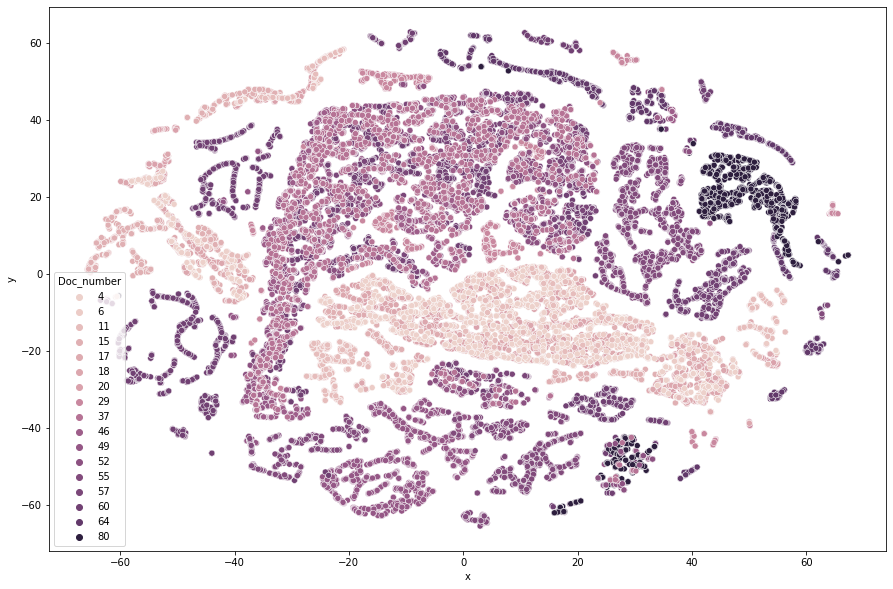

In [38]:
# model original traindata
m = TSNE(n_components =2,learning_rate = 100)
tsne_features = m.fit_transform(df_train.iloc[:,0:72])
df_train['x'] = tsne_features[:,0]
df_train['y'] = tsne_features[:,1]
# plotting
fig = plt.gcf()
fig.set_size_inches(15, 10)
sns.scatterplot(x ='x', y = 'y', hue = 'Doc_number', legend = 'full', data = df_train)
plt.show()

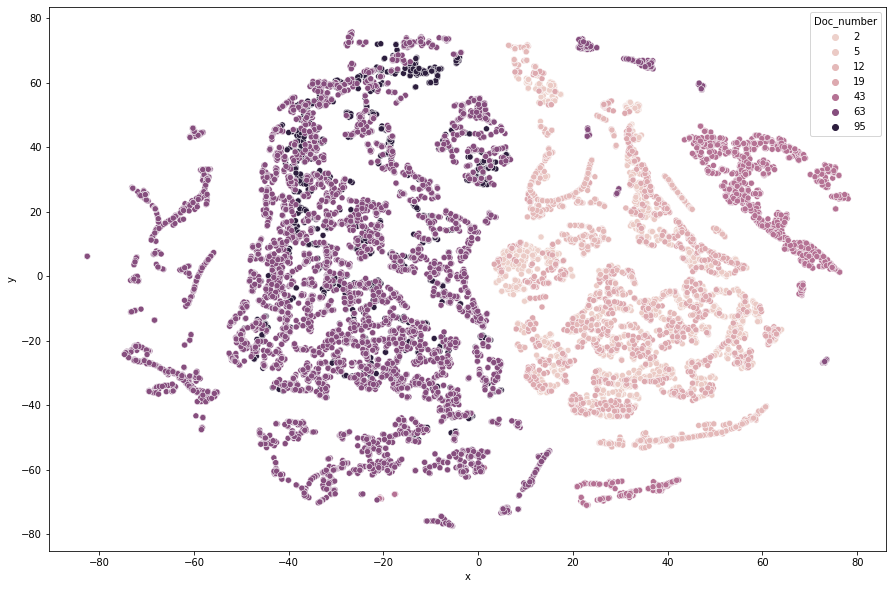

In [88]:
# model original testdata
m = TSNE(n_components =2,learning_rate = 100)
tsne_features = m.fit_transform(df_test.iloc[:,0:72])
df_test['x'] = tsne_features[:,0]
df_test['y'] = tsne_features[:,1]
# plotting
fig = plt.gcf()
fig.set_size_inches(15, 10)
sns.scatterplot(x ='x', y = 'y', hue = 'Doc_number', legend = 'full', data = df_test)
plt.show()

In [304]:
df_train.describe()

,Wheel speed,hub angle,blade 1 angle,blade 2 angle,blade 3 angle,pitch motor 1 current,pitch motor 2 current,pitch motor 3 current,overspeed sensor speed detection value,5 second yaw against wind average,...,blade 2 inverter box temperature,blade 3 inverter box temperature,blade 1 super capacitor voltage,blade 2 super capacitor voltage,blade 3 super capacitor voltage,drive 1 thyristor temperature,drive 2 thyristor temperature,drive 3 thyristor temperature,ret,Doc_number
count,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,...,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000
mean,6.246531,153.520255,27.828726,36.267496,34.844082,7.203330,6.967125,7.281687,4.421559,0.962919,...,24.674189,100.523606,20.066155,19.828494,20.021625,19.924414,526.554493,1.900273,0.487320,42.028507
std,6.021155,88.942827,65.482812,42.218853,40.993216,5.332707,5.257402,5.367004,5.800029,40.758025,...,13.763557,122.916447,22.332113,22.078310,22.283119,23.948268,4661.521118,2.271100,0.499847,20.512087
min,-0.437156,0.000000,-322.220000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.209133,-176.363170,...,-6.668966,-4.002222,0.000000,0.000000,0.000000,-5.000000,0.000000,-0.300000,0.000000,4.000000
25%,0.000489,100.536111,0.247120,0.258900,0.259411,0.000000,0.000000,0.000000,0.000000,-5.893836,...,14.298991,15.837778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
50%,7.244252,176.764444,1.934610,4.280815,4.261233,10.584939,10.512231,10.622444,0.097267,0.074388,...,26.000000,36.915138,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.000000
75%,11.337295,182.613333,86.000000,90.291921,85.980000,11.209367,11.159807,11.298498,9.130587,6.520065,...,35.000000,297.911833,44.929821,44.831106,44.870583,44.674894,438.883929,4.401556,1.000000,57.000000
max,17.502125,359.196429,211.750000,93.640000,121.983394,18.827082,18.938133,18.561682,17.288644,175.848222,...,53.830275,300.000000,45.208133,45.098556,45.190911,73.673333,65526.000000,6.865111,1.000000,80.000000


In [305]:
# Modus most frequently occur mode() function statistics.mode() takes some data and returns its (first) mode
def mode1(df):
    l = []
    for i in df:
        if (len(set(df[i])) == len(df[i])):
            num = -1
            return num
        else:
            m = statistics.mode(df[i])
            l.append(m)
    return l

In [306]:
mode1(df_train)

[0.0,
 0.0,
 0.2399999999999983,
 90.44999999999986,
 62.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.039999999999999536,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 527.100000000004,
 0.0,
 11.75,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 25.0,
 0.0,
 0.0,
 0.0,
 6.0,
 6.0,
 4.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 300.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0,
 60]

In [307]:
# add new list(mode) into describetable and change it name.
dt = df_train.describe()
cnt = dt.count()[0]
dt.loc[len(dt)] = mode1(df_train)
dt = dt.rename(index = {cnt:'mode'})
display(dt)
print(cnt)

,Wheel speed,hub angle,blade 1 angle,blade 2 angle,blade 3 angle,pitch motor 1 current,pitch motor 2 current,pitch motor 3 current,overspeed sensor speed detection value,5 second yaw against wind average,...,blade 2 inverter box temperature,blade 3 inverter box temperature,blade 1 super capacitor voltage,blade 2 super capacitor voltage,blade 3 super capacitor voltage,drive 1 thyristor temperature,drive 2 thyristor temperature,drive 3 thyristor temperature,ret,Doc_number
count,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,...,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000
mean,6.246531,153.520255,27.828726,36.267496,34.844082,7.203330,6.967125,7.281687,4.421559,0.962919,...,24.674189,100.523606,20.066155,19.828494,20.021625,19.924414,526.554493,1.900273,0.487320,42.028507
std,6.021155,88.942827,65.482812,42.218853,40.993216,5.332707,5.257402,5.367004,5.800029,40.758025,...,13.763557,122.916447,22.332113,22.078310,22.283119,23.948268,4661.521118,2.271100,0.499847,20.512087
min,-0.437156,0.000000,-322.220000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.209133,-176.363170,...,-6.668966,-4.002222,0.000000,0.000000,0.000000,-5.000000,0.000000,-0.300000,0.000000,4.000000
25%,0.000489,100.536111,0.247120,0.258900,0.259411,0.000000,0.000000,0.000000,0.000000,-5.893836,...,14.298991,15.837778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
50%,7.244252,176.764444,1.934610,4.280815,4.261233,10.584939,10.512231,10.622444,0.097267,0.074388,...,26.000000,36.915138,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.000000
75%,11.337295,182.613333,86.000000,90.291921,85.980000,11.209367,11.159807,11.298498,9.130587,6.520065,...,35.000000,297.911833,44.929821,44.831106,44.870583,44.674894,438.883929,4.401556,1.000000,57.000000
max,17.502125,359.196429,211.750000,93.640000,121.983394,18.827082,18.938133,18.561682,17.288644,175.848222,...,53.830275,300.000000,45.208133,45.098556,45.190911,73.673333,65526.000000,6.865111,1.000000,80.000000
mode,0.000000,0.000000,0.240000,90.450000,62.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000


8


In [308]:
# add the row of Spannweite
cnt = dt.count()[0]
span = dt.loc['max'] - dt.loc['min']
dt.loc[len(dt)] = span
dt = dt.rename(index = {cnt:'span'})
display(dt)

,Wheel speed,hub angle,blade 1 angle,blade 2 angle,blade 3 angle,pitch motor 1 current,pitch motor 2 current,pitch motor 3 current,overspeed sensor speed detection value,5 second yaw against wind average,...,blade 2 inverter box temperature,blade 3 inverter box temperature,blade 1 super capacitor voltage,blade 2 super capacitor voltage,blade 3 super capacitor voltage,drive 1 thyristor temperature,drive 2 thyristor temperature,drive 3 thyristor temperature,ret,Doc_number
count,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,...,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000
mean,6.246531,153.520255,27.828726,36.267496,34.844082,7.203330,6.967125,7.281687,4.421559,0.962919,...,24.674189,100.523606,20.066155,19.828494,20.021625,19.924414,526.554493,1.900273,0.487320,42.028507
std,6.021155,88.942827,65.482812,42.218853,40.993216,5.332707,5.257402,5.367004,5.800029,40.758025,...,13.763557,122.916447,22.332113,22.078310,22.283119,23.948268,4661.521118,2.271100,0.499847,20.512087
min,-0.437156,0.000000,-322.220000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.209133,-176.363170,...,-6.668966,-4.002222,0.000000,0.000000,0.000000,-5.000000,0.000000,-0.300000,0.000000,4.000000
25%,0.000489,100.536111,0.247120,0.258900,0.259411,0.000000,0.000000,0.000000,0.000000,-5.893836,...,14.298991,15.837778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
50%,7.244252,176.764444,1.934610,4.280815,4.261233,10.584939,10.512231,10.622444,0.097267,0.074388,...,26.000000,36.915138,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.000000
75%,11.337295,182.613333,86.000000,90.291921,85.980000,11.209367,11.159807,11.298498,9.130587,6.520065,...,35.000000,297.911833,44.929821,44.831106,44.870583,44.674894,438.883929,4.401556,1.000000,57.000000
max,17.502125,359.196429,211.750000,93.640000,121.983394,18.827082,18.938133,18.561682,17.288644,175.848222,...,53.830275,300.000000,45.208133,45.098556,45.190911,73.673333,65526.000000,6.865111,1.000000,80.000000
mode,0.000000,0.000000,0.240000,90.450000,62.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000
span,17.939280,359.196429,533.970000,93.640000,121.983394,18.827082,18.938133,18.561682,17.497778,352.211392,...,60.499241,304.002222,45.208133,45.098556,45.190911,78.673333,65526.000000,7.165111,1.000000,76.000000


In [309]:
dt

,Wheel speed,hub angle,blade 1 angle,blade 2 angle,blade 3 angle,pitch motor 1 current,pitch motor 2 current,pitch motor 3 current,overspeed sensor speed detection value,5 second yaw against wind average,...,blade 2 inverter box temperature,blade 3 inverter box temperature,blade 1 super capacitor voltage,blade 2 super capacitor voltage,blade 3 super capacitor voltage,drive 1 thyristor temperature,drive 2 thyristor temperature,drive 3 thyristor temperature,ret,Doc_number
count,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,...,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000
mean,6.246531,153.520255,27.828726,36.267496,34.844082,7.203330,6.967125,7.281687,4.421559,0.962919,...,24.674189,100.523606,20.066155,19.828494,20.021625,19.924414,526.554493,1.900273,0.487320,42.028507
std,6.021155,88.942827,65.482812,42.218853,40.993216,5.332707,5.257402,5.367004,5.800029,40.758025,...,13.763557,122.916447,22.332113,22.078310,22.283119,23.948268,4661.521118,2.271100,0.499847,20.512087
min,-0.437156,0.000000,-322.220000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.209133,-176.363170,...,-6.668966,-4.002222,0.000000,0.000000,0.000000,-5.000000,0.000000,-0.300000,0.000000,4.000000
25%,0.000489,100.536111,0.247120,0.258900,0.259411,0.000000,0.000000,0.000000,0.000000,-5.893836,...,14.298991,15.837778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
50%,7.244252,176.764444,1.934610,4.280815,4.261233,10.584939,10.512231,10.622444,0.097267,0.074388,...,26.000000,36.915138,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.000000
75%,11.337295,182.613333,86.000000,90.291921,85.980000,11.209367,11.159807,11.298498,9.130587,6.520065,...,35.000000,297.911833,44.929821,44.831106,44.870583,44.674894,438.883929,4.401556,1.000000,57.000000
max,17.502125,359.196429,211.750000,93.640000,121.983394,18.827082,18.938133,18.561682,17.288644,175.848222,...,53.830275,300.000000,45.208133,45.098556,45.190911,73.673333,65526.000000,6.865111,1.000000,80.000000
mode,0.000000,0.000000,0.240000,90.450000,62.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000
span,17.939280,359.196429,533.970000,93.640000,121.983394,18.827082,18.938133,18.561682,17.497778,352.211392,...,60.499241,304.002222,45.208133,45.098556,45.190911,78.673333,65526.000000,7.165111,1.000000,76.000000


### Outliers

In [314]:
def outliers(df):
    """
    data: pandas.DataFrame
    """
    data_np = df.to_numpy()
    q1 = np.quantile(data_np, 0.25, axis=0)
    q3 = np.quantile(data_np, 0.75, axis=0)
    diff = q3 - q1
    outliers = data_np * np.logical_or((data_np < q1 - 1.5 * diff), (data_np > q3 + 1.5 * diff))
    
    dst_dict = {}
    for i_col, key in enumerate(df.columns.tolist()):
        column = outliers[:, i_col]
        dst_dict[key] = column[np.nonzero(column)]
    return dst_dict

In [315]:
outliers(df_train)

{'Wheel speed': array([], dtype=float64),
 'hub angle': array([320.32666667, 347.93777778, 343.33333333, ..., 349.3584375 ,
        349.20702461, 347.76348416]),
 'blade 1 angle': array([-322.22      , -321.50395556, -322.22      , -322.22      ,
        -322.22      , -321.49753363, -322.22      , -322.22      ,
        -322.22      , -322.22      , -322.22      , -322.22      ,
        -321.42439506, -322.22      , -321.5023608 , -322.22      ,
        -321.42044665, -322.22      , -322.22      , -322.22      ,
        -321.50395556, -322.22      , -322.22      , -322.22      ,
        -322.22      , -322.22      , -322.22      , -322.22      ,
        -322.22      , -322.22      , -322.22      , -322.22      ,
        -322.22      , -322.22      , -322.22      , -321.50395556,
        -321.40218274, -322.22      , -322.22      , -322.22      ,
        -322.22      , -322.22      , -322.22      , -322.22      ,
        -322.22      , -322.22      , -321.50395556, -322.22      ,
     

### features mit outliers wie folgendes
'hub angle',
'blade 1 angle',
'overspeed sensor speed detection value',
'5 second yaw against wind average',
'x direction vibration value',
'y direction vibration value',
'Aircraft weather station wind speed',
'atmospheric pressure',
'inverter grid side current',
'inverter grid side active power',
'inverter grid side reactive power',
'inverter generator side power',
'generator current',
'generator torque',
'inverter inlet pressure',
'Rated hub speed', 
'generator stator temperature 1', 
'generator stator temperature 2',
'generator stator temperature 3',
'generator stator temperature 4',
'generator stator temperature 5',
'generator stator temperature 6', 
'generator air temperature 1',
'generator air temperature 2',
'Pitch motor 1 power estimation',
'Pitch motor 2 power estimation',
'Pitch motor 3 power estimation',
'yaw request value',
'blade 2 battery box temperature',
'vane 1 pitch motor temperature',
'blade 2 pitch motor temperature',
'blade 3 pitch motor temperature',
'drive 2 thyristor temperature'

In [316]:
dt_outliers = dt[['hub angle',
'blade 1 angle',
'overspeed sensor speed detection value',
'5 second yaw against wind average',
'x direction vibration value',
'y direction vibration value',
'Aircraft weather station wind speed',
'atmospheric pressure',
'inverter grid side current',
'inverter grid side active power',
'inverter grid side reactive power',
'inverter generator side power',
'generator current',
'generator torque',
'inverter inlet pressure',
'Rated hub speed', 
'generator stator temperature 1', 
'generator stator temperature 2',
'generator stator temperature 3',
'generator stator temperature 4',
'generator stator temperature 5',
'generator stator temperature 6', 
'generator air temperature 1',
'generator air temperature 2',
'Pitch motor 1 power estimation',
'Pitch motor 2 power estimation',
'Pitch motor 3 power estimation',
'yaw request value',
'blade 2 battery box temperature',
'vane 1 pitch motor temperature',
'blade 2 pitch motor temperature',
'blade 3 pitch motor temperature',
'drive 2 thyristor temperature']]
dt_outliers

,hub angle,blade 1 angle,overspeed sensor speed detection value,5 second yaw against wind average,x direction vibration value,y direction vibration value,Aircraft weather station wind speed,atmospheric pressure,inverter grid side current,inverter grid side active power,...,generator air temperature 2,Pitch motor 1 power estimation,Pitch motor 2 power estimation,Pitch motor 3 power estimation,yaw request value,blade 2 battery box temperature,vane 1 pitch motor temperature,blade 2 pitch motor temperature,blade 3 pitch motor temperature,drive 2 thyristor temperature
count,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,...,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000
mean,153.520255,27.828726,4.421559,0.962919,0.040601,0.046067,5.866383,0.995178,371.693226,354.880132,...,23.354857,-0.924113,-0.871803,-0.871147,0.047276,21.038190,36.679564,36.240832,35.797775,526.554493
std,88.942827,65.482812,5.800029,40.758025,0.062892,0.064695,3.424978,0.054505,451.808793,538.459415,...,22.938007,5.906339,5.461996,5.721455,0.108480,9.576924,20.619366,23.727305,23.212511,4661.521118
min,0.000000,-322.220000,-0.209133,-176.363170,-0.843600,-0.876178,0.000000,0.000000,0.000000,-0.584135,...,-18.600000,-82.858667,-99.007177,-74.461111,0.000000,-2.657778,-0.088889,0.000000,0.000000,0.000000
25%,100.536111,0.247120,0.000000,-5.893836,0.010179,0.008138,3.299314,0.997706,0.000000,0.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,16.000000,18.953173,19.000000,17.837222,0.000000
50%,176.764444,1.934610,0.097267,0.074388,0.039867,0.031800,5.433333,1.000000,289.681449,75.995515,...,25.182539,0.000000,0.000000,0.000000,0.000000,23.946548,35.463658,32.479180,33.173674,0.000000
75%,182.613333,86.000000,9.130587,6.520065,0.083358,0.088694,8.061611,1.000000,516.330000,495.045000,...,37.195597,0.000000,0.000000,0.000000,0.045238,28.000000,47.000000,46.594502,44.899833,438.883929
max,359.196429,211.750000,17.288644,175.848222,0.148956,0.186667,21.777317,1.000000,1834.022222,2142.884444,...,105.823556,62.074000,60.132870,102.680861,1.991011,40.000000,116.060000,116.000000,114.000000,65526.000000
mode,0.000000,0.240000,0.000000,0.000000,0.040000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
span,359.196429,533.970000,17.497778,352.211392,0.992556,1.062844,21.777317,1.000000,1834.022222,2143.468579,...,124.423556,144.932667,159.140047,177.141972,1.991011,42.657778,116.148889,116.000000,114.000000,65526.000000


In [323]:
# delete all outliers traindata
z_scores = stats.zscore(df_train)


abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3).all(axis=1)

new_df = df_train[filtered_entries]


new_df

,Wheel speed,hub angle,blade 1 angle,blade 2 angle,blade 3 angle,pitch motor 1 current,pitch motor 2 current,pitch motor 3 current,overspeed sensor speed detection value,5 second yaw against wind average,...,blade 2 inverter box temperature,blade 3 inverter box temperature,blade 1 super capacitor voltage,blade 2 super capacitor voltage,blade 3 super capacitor voltage,drive 1 thyristor temperature,drive 2 thyristor temperature,drive 3 thyristor temperature,ret,Doc_number
0,5.529665,47.892857,3.824978,3.840446,3.840513,10.674554,10.673214,10.680804,0.000000,11.230134,...,48.015625,51.549107,44.915781,44.907768,44.294844,68.002232,607.566964,5.902679,1,49
1,0.000000,78.000000,92.550000,91.840000,92.750000,0.000000,0.000000,0.000000,0.107333,66.866889,...,19.002222,24.993333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,49
2,8.493289,64.000000,0.250000,0.270000,0.270000,10.838222,10.755111,10.796222,0.000000,3.346444,...,48.000000,51.993333,45.019622,45.013067,44.394889,67.966667,603.155556,5.883333,0,49
3,15.648132,171.082742,0.396123,0.455650,0.455650,11.928369,11.715130,11.746099,0.000000,-7.723641,...,47.546099,47.498818,44.604468,44.597470,43.984137,65.276596,546.501182,5.371631,0,49
4,0.000436,20.768349,92.294679,91.528211,92.135413,0.000000,0.000000,0.000000,0.096078,81.463073,...,16.619266,12.222477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33355,0.000000,349.207025,91.923893,93.430515,92.352931,0.003132,0.000000,0.000000,0.054161,-54.912304,...,15.964206,299.328859,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,11
33356,14.241911,188.439867,0.424444,0.402978,0.410867,11.772711,11.478444,12.657511,14.323778,-1.932667,...,31.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,11
33357,0.000000,347.763484,91.613937,93.004434,91.931765,0.001312,0.000000,0.000000,0.054095,-66.838914,...,15.891403,297.963801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,11
33358,11.469689,184.981578,6.267733,6.222200,6.211933,8.125600,7.821156,8.871867,11.542422,-2.090000,...,31.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,11


In [324]:
# delete all outliers testdata
z_scores = stats.zscore(df_test)


abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3).all(axis=1)

new_test_df = df_test[filtered_entries]


new_test_df

,Wheel speed,hub angle,blade 1 angle,blade 2 angle,blade 3 angle,pitch motor 1 current,pitch motor 2 current,pitch motor 3 current,overspeed sensor speed detection value,5 second yaw against wind average,...,blade 2 inverter box temperature,blade 3 inverter box temperature,blade 1 super capacitor voltage,blade 2 super capacitor voltage,blade 3 super capacitor voltage,drive 1 thyristor temperature,drive 2 thyristor temperature,drive 3 thyristor temperature,ret,Doc_number
0,1.532533,179.461600,21.000000,21.000000,21.000000,2.000089,2.221689,2.846667,1.666556,-4.256889,...,31.260000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2
1,0.002667,116.169111,86.000000,86.000000,86.000000,13.258000,14.416978,1.827378,0.116622,-5.490000,...,38.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2
2,12.593047,173.786437,0.238108,0.316855,0.227740,10.042211,9.819115,11.399066,12.838452,1.943735,...,34.656020,297.051597,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2
3,10.409794,179.527248,0.267408,0.286170,0.258647,7.791422,8.224771,8.790367,10.634495,-3.081881,...,29.864679,297.935780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2
4,12.855189,182.117082,0.240601,0.319287,0.229488,10.379465,10.068731,11.764633,13.103497,-5.065702,...,33.924276,299.331849,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14970,0.424889,180.911111,85.980000,85.980000,85.980000,11.085778,11.340889,11.134000,0.000000,-1.834222,...,19.735556,20.806667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,63
14971,16.217044,179.240000,6.241111,6.247578,6.240778,14.415333,14.927556,14.813333,0.000356,6.894222,...,24.195556,25.757778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,63
14972,0.000000,55.744875,85.588292,85.588292,85.588292,10.767426,12.443280,11.343508,0.105695,18.899089,...,20.904328,16.922551,44.615786,44.690068,44.655558,42.956720,344.738041,3.707289,0.0,63
14973,13.462156,64.000000,3.728711,3.716511,3.715578,12.377778,12.488889,12.531111,13.732089,-5.626000,...,18.662222,19.000000,44.817556,44.848356,44.866133,45.897778,332.022222,3.891333,0.0,63


<ipython-input-39-d85ad7a87e1e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['x'] = tsne_features[:,0]
<ipython-input-39-d85ad7a87e1e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['y'] = tsne_features[:,1]


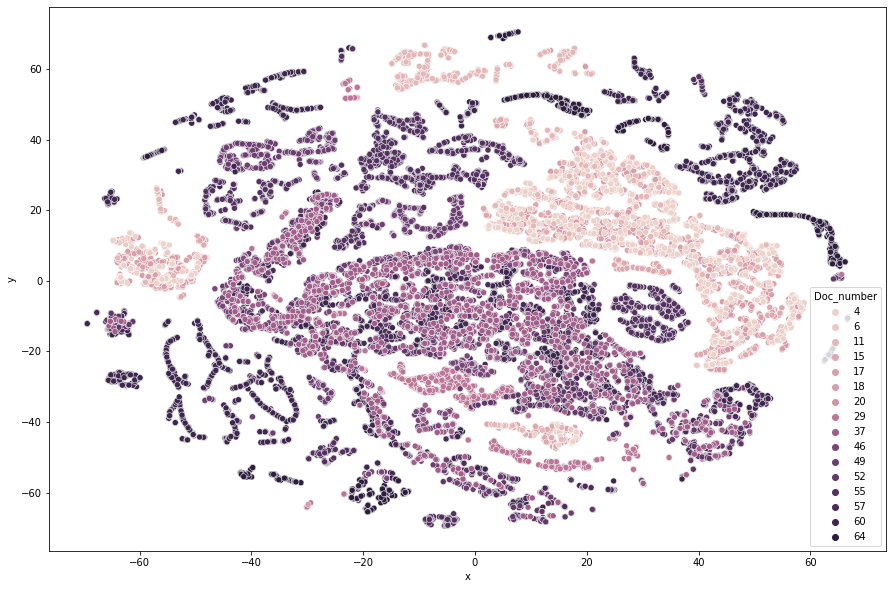

In [39]:
# model onhe outliers traindata
m = TSNE(n_components =2,learning_rate = 100)
tsne_features = m.fit_transform(new_df.iloc[:,0:72])
new_df['x'] = tsne_features[:,0]
new_df['y'] = tsne_features[:,1]
# plotting
fig = plt.gcf()
fig.set_size_inches(15, 10)
sns.scatterplot(x ='x', y = 'y', hue = 'Doc_number', legend = 'full', data = new_df)
plt.show()

In [331]:
new_test_df

,Wheel speed,hub angle,blade 1 angle,blade 2 angle,blade 3 angle,pitch motor 1 current,pitch motor 2 current,pitch motor 3 current,overspeed sensor speed detection value,5 second yaw against wind average,...,blade 2 inverter box temperature,blade 3 inverter box temperature,blade 1 super capacitor voltage,blade 2 super capacitor voltage,blade 3 super capacitor voltage,drive 1 thyristor temperature,drive 2 thyristor temperature,drive 3 thyristor temperature,ret,Doc_number
0,1.532533,179.461600,21.000000,21.000000,21.000000,2.000089,2.221689,2.846667,1.666556,-4.256889,...,31.260000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2
1,0.002667,116.169111,86.000000,86.000000,86.000000,13.258000,14.416978,1.827378,0.116622,-5.490000,...,38.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2
2,12.593047,173.786437,0.238108,0.316855,0.227740,10.042211,9.819115,11.399066,12.838452,1.943735,...,34.656020,297.051597,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2
3,10.409794,179.527248,0.267408,0.286170,0.258647,7.791422,8.224771,8.790367,10.634495,-3.081881,...,29.864679,297.935780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2
4,12.855189,182.117082,0.240601,0.319287,0.229488,10.379465,10.068731,11.764633,13.103497,-5.065702,...,33.924276,299.331849,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12617,0.424889,180.911111,85.980000,85.980000,85.980000,11.085778,11.340889,11.134000,0.000000,-1.834222,...,19.735556,20.806667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,63
12618,16.217044,179.240000,6.241111,6.247578,6.240778,14.415333,14.927556,14.813333,0.000356,6.894222,...,24.195556,25.757778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,63
12619,0.000000,55.744875,85.588292,85.588292,85.588292,10.767426,12.443280,11.343508,0.105695,18.899089,...,20.904328,16.922551,44.615786,44.690068,44.655558,42.956720,344.738041,3.707289,0.0,63
12620,13.462156,64.000000,3.728711,3.716511,3.715578,12.377778,12.488889,12.531111,13.732089,-5.626000,...,18.662222,19.000000,44.817556,44.848356,44.866133,45.897778,332.022222,3.891333,0.0,63


<ipython-input-332-d9db93110cac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test_df['x'] = tsne_features[:,0]
<ipython-input-332-d9db93110cac>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test_df['y'] = tsne_features[:,1]


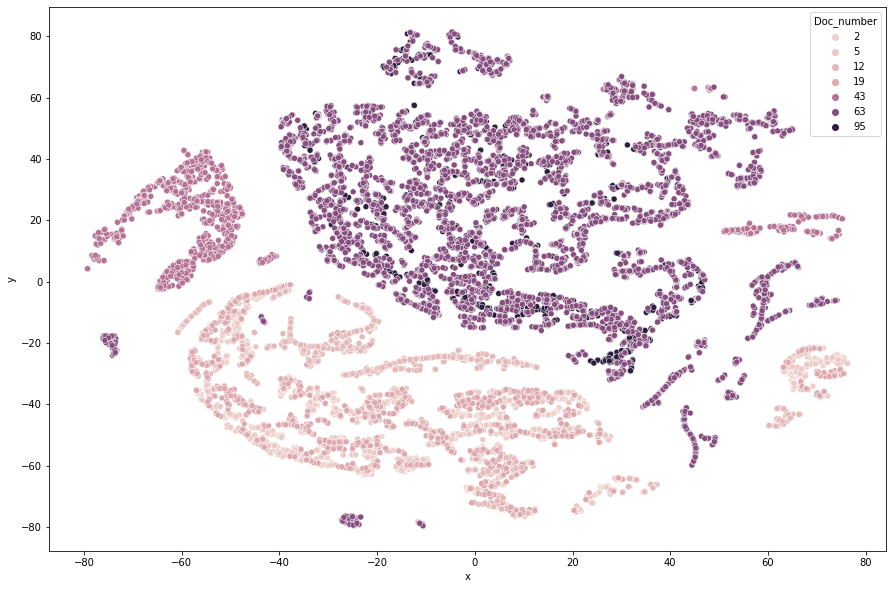

In [332]:
# model onhe outliers testdata
m = TSNE(n_components =2,learning_rate = 100)
tsne_features = m.fit_transform(new_test_df.iloc[:,0:72])
new_test_df['x'] = tsne_features[:,0]
new_test_df['y'] = tsne_features[:,1]
# plotting
fig = plt.gcf()
fig.set_size_inches(15, 10)
sns.scatterplot(x ='x', y = 'y', hue = 'Doc_number', legend = 'full', data = new_test_df)
plt.show()

### korrigieren index

In [319]:
new_df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     8,     9,
               10,
            ...
            33348, 33349, 33350, 33352, 33353, 33355, 33356, 33357, 33358,
            33359],
           dtype='int64', length=26075)

In [320]:
l = np.arange(0, 26075, 1).tolist()
l

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [ ]:
new_df.index = l
new_df

In [ ]:
new_test_df.index

In [328]:
l = np.arange(0, 12622, 1).tolist()
l

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [329]:
new_test_df.index = l
new_test_df

,Wheel speed,hub angle,blade 1 angle,blade 2 angle,blade 3 angle,pitch motor 1 current,pitch motor 2 current,pitch motor 3 current,overspeed sensor speed detection value,5 second yaw against wind average,...,blade 2 inverter box temperature,blade 3 inverter box temperature,blade 1 super capacitor voltage,blade 2 super capacitor voltage,blade 3 super capacitor voltage,drive 1 thyristor temperature,drive 2 thyristor temperature,drive 3 thyristor temperature,ret,Doc_number
0,1.532533,179.461600,21.000000,21.000000,21.000000,2.000089,2.221689,2.846667,1.666556,-4.256889,...,31.260000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2
1,0.002667,116.169111,86.000000,86.000000,86.000000,13.258000,14.416978,1.827378,0.116622,-5.490000,...,38.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2
2,12.593047,173.786437,0.238108,0.316855,0.227740,10.042211,9.819115,11.399066,12.838452,1.943735,...,34.656020,297.051597,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2
3,10.409794,179.527248,0.267408,0.286170,0.258647,7.791422,8.224771,8.790367,10.634495,-3.081881,...,29.864679,297.935780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2
4,12.855189,182.117082,0.240601,0.319287,0.229488,10.379465,10.068731,11.764633,13.103497,-5.065702,...,33.924276,299.331849,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12617,0.424889,180.911111,85.980000,85.980000,85.980000,11.085778,11.340889,11.134000,0.000000,-1.834222,...,19.735556,20.806667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,63
12618,16.217044,179.240000,6.241111,6.247578,6.240778,14.415333,14.927556,14.813333,0.000356,6.894222,...,24.195556,25.757778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,63
12619,0.000000,55.744875,85.588292,85.588292,85.588292,10.767426,12.443280,11.343508,0.105695,18.899089,...,20.904328,16.922551,44.615786,44.690068,44.655558,42.956720,344.738041,3.707289,0.0,63
12620,13.462156,64.000000,3.728711,3.716511,3.715578,12.377778,12.488889,12.531111,13.732089,-5.626000,...,18.662222,19.000000,44.817556,44.848356,44.866133,45.897778,332.022222,3.891333,0.0,63


In [333]:
new_df

,Wheel speed,hub angle,blade 1 angle,blade 2 angle,blade 3 angle,pitch motor 1 current,pitch motor 2 current,pitch motor 3 current,overspeed sensor speed detection value,5 second yaw against wind average,...,blade 2 inverter box temperature,blade 3 inverter box temperature,blade 1 super capacitor voltage,blade 2 super capacitor voltage,blade 3 super capacitor voltage,drive 1 thyristor temperature,drive 2 thyristor temperature,drive 3 thyristor temperature,ret,Doc_number
0,5.529665,47.892857,3.824978,3.840446,3.840513,10.674554,10.673214,10.680804,0.000000,11.230134,...,48.015625,51.549107,44.915781,44.907768,44.294844,68.002232,607.566964,5.902679,1,49
1,0.000000,78.000000,92.550000,91.840000,92.750000,0.000000,0.000000,0.000000,0.107333,66.866889,...,19.002222,24.993333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,49
2,8.493289,64.000000,0.250000,0.270000,0.270000,10.838222,10.755111,10.796222,0.000000,3.346444,...,48.000000,51.993333,45.019622,45.013067,44.394889,67.966667,603.155556,5.883333,0,49
3,15.648132,171.082742,0.396123,0.455650,0.455650,11.928369,11.715130,11.746099,0.000000,-7.723641,...,47.546099,47.498818,44.604468,44.597470,43.984137,65.276596,546.501182,5.371631,0,49
4,0.000436,20.768349,92.294679,91.528211,92.135413,0.000000,0.000000,0.000000,0.096078,81.463073,...,16.619266,12.222477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33355,0.000000,349.207025,91.923893,93.430515,92.352931,0.003132,0.000000,0.000000,0.054161,-54.912304,...,15.964206,299.328859,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,11
33356,14.241911,188.439867,0.424444,0.402978,0.410867,11.772711,11.478444,12.657511,14.323778,-1.932667,...,31.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,11
33357,0.000000,347.763484,91.613937,93.004434,91.931765,0.001312,0.000000,0.000000,0.054095,-66.838914,...,15.891403,297.963801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,11
33358,11.469689,184.981578,6.267733,6.222200,6.211933,8.125600,7.821156,8.871867,11.542422,-2.090000,...,31.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,11


In [334]:
new_test_df

,Wheel speed,hub angle,blade 1 angle,blade 2 angle,blade 3 angle,pitch motor 1 current,pitch motor 2 current,pitch motor 3 current,overspeed sensor speed detection value,5 second yaw against wind average,...,blade 1 super capacitor voltage,blade 2 super capacitor voltage,blade 3 super capacitor voltage,drive 1 thyristor temperature,drive 2 thyristor temperature,drive 3 thyristor temperature,ret,Doc_number,x,y
0,1.532533,179.461600,21.000000,21.000000,21.000000,2.000089,2.221689,2.846667,1.666556,-4.256889,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2,20.451122,-36.565769
1,0.002667,116.169111,86.000000,86.000000,86.000000,13.258000,14.416978,1.827378,0.116622,-5.490000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2,66.944534,-31.205906
2,12.593047,173.786437,0.238108,0.316855,0.227740,10.042211,9.819115,11.399066,12.838452,1.943735,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2,-35.976868,-35.841198
3,10.409794,179.527248,0.267408,0.286170,0.258647,7.791422,8.224771,8.790367,10.634495,-3.081881,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2,-21.290794,-38.872669
4,12.855189,182.117082,0.240601,0.319287,0.229488,10.379465,10.068731,11.764633,13.103497,-5.065702,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2,-45.934914,-38.897518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12617,0.424889,180.911111,85.980000,85.980000,85.980000,11.085778,11.340889,11.134000,0.000000,-1.834222,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,63,45.758018,-19.648550
12618,16.217044,179.240000,6.241111,6.247578,6.240778,14.415333,14.927556,14.813333,0.000356,6.894222,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,63,-33.890018,-5.483142
12619,0.000000,55.744875,85.588292,85.588292,85.588292,10.767426,12.443280,11.343508,0.105695,18.899089,...,44.615786,44.690068,44.655558,42.956720,344.738041,3.707289,0.0,63,49.307056,41.817673
12620,13.462156,64.000000,3.728711,3.716511,3.715578,12.377778,12.488889,12.531111,13.732089,-5.626000,...,44.817556,44.848356,44.866133,45.897778,332.022222,3.891333,0.0,63,18.648464,10.733006


### Data drift

<Figure size 432x288 with 0 Axes>

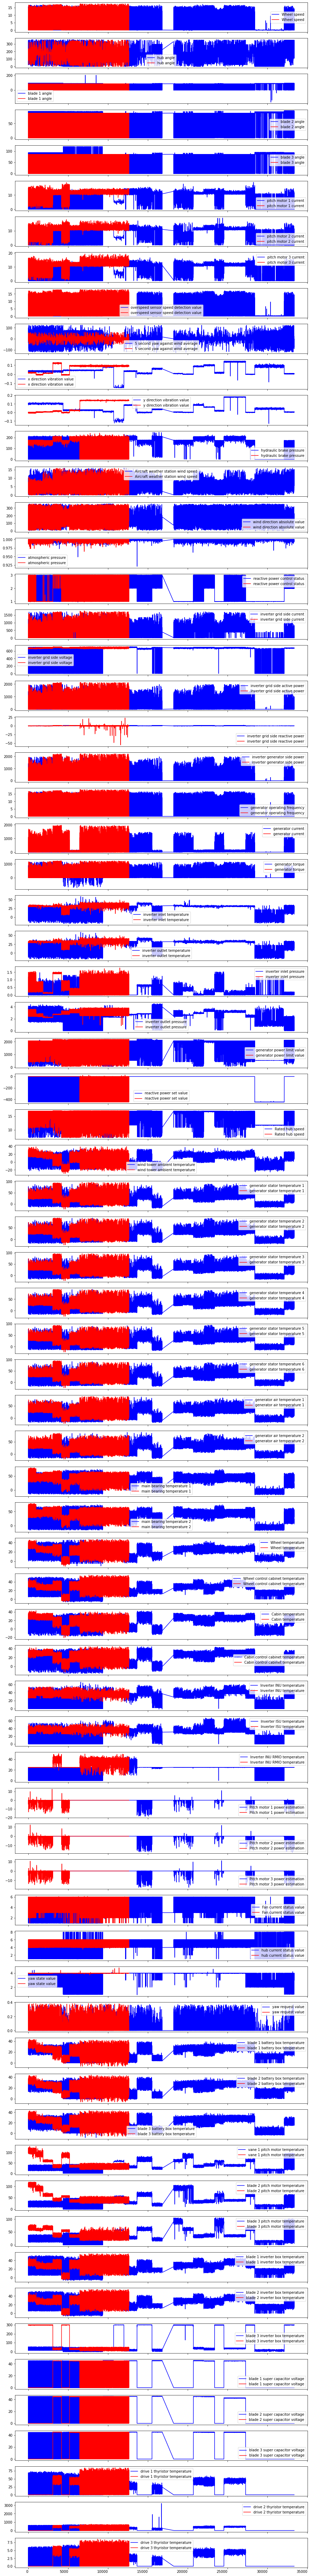

In [335]:
plt.figure()
ax = new_df.iloc[:,0:72].plot(subplots= True,figsize=(15, 150), color = 'blue')
new_test_df.iloc[:,0:72].plot(ax=ax,subplots= True,figsize=(15, 150), color = 'red')
plt.legend(loc='best')

###  sensor löschen 

In [336]:
new_df22 = new_df[['Wheel speed',
'hub angle',
'blade 1 angle',
'blade 2 angle',
'blade 3 angle',
'overspeed sensor speed detection value',
'Aircraft weather station wind speed',
'wind direction absolute value',
'atmospheric pressure',
'reactive power control status',
'inverter grid side current',
'inverter grid side active power',
'inverter grid side reactive power',
'inverter generator side power',
'generator operating frequency',
'generator current',
'generator torque',
'generator power limit value',
'Rated hub speed',
'Fan current status value',
'yaw request value','ret']]

In [337]:
new_test_df22 = new_test_df[['Wheel speed',
'hub angle',
'blade 1 angle',
'blade 2 angle',
'blade 3 angle',
'overspeed sensor speed detection value',
'Aircraft weather station wind speed',
'wind direction absolute value',
'atmospheric pressure',
'reactive power control status',
'inverter grid side current',
'inverter grid side active power',
'inverter grid side reactive power',
'inverter generator side power',
'generator operating frequency',
'generator current',
'generator torque',
'generator power limit value',
'Rated hub speed',
'Fan current status value',
'yaw request value','ret']]

In [260]:
new_test_df22

,Wheel speed,hub angle,blade 1 angle,blade 2 angle,blade 3 angle,overspeed sensor speed detection value,Aircraft weather station wind speed,wind direction absolute value,atmospheric pressure,reactive power control status,...,inverter grid side reactive power,inverter generator side power,generator operating frequency,generator current,generator torque,generator power limit value,Rated hub speed,Fan current status value,yaw request value,ret
0,1.532533,179.461600,21.000000,21.000000,21.000000,1.666556,2.086889,74.373333,1.000000,1.000000,...,-0.008889,0.000000,1.530222,3.083556,0.000000,2067.600000,16.830000,5.000000,0.155556,1.0
1,0.002667,116.169111,86.000000,86.000000,86.000000,0.116622,2.351111,131.188889,1.000000,1.000000,...,0.000000,0.000000,0.000000,2.844889,0.000000,2067.600000,16.830000,2.000000,0.000000,0.0
2,12.593047,173.786437,0.238108,0.316855,0.227740,12.838452,6.426044,69.914005,0.990172,0.990172,...,-0.071253,641.228501,12.584619,726.034152,496.095823,1847.206634,16.364816,5.941032,0.000000,1.0
3,10.409794,179.527248,0.267408,0.286170,0.258647,10.634495,5.647477,23.355505,0.993119,0.993119,...,0.103211,394.818807,10.403624,508.670413,348.192661,1639.921101,15.985115,5.958716,0.130734,0.0
4,12.855189,182.117082,0.240601,0.319287,0.229488,13.103497,6.828062,9.269488,0.997773,0.997773,...,-0.171492,675.786192,12.848998,751.607350,513.354120,2062.995100,16.792517,5.986637,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12617,0.424889,180.911111,85.980000,85.980000,85.980000,0.000000,14.068000,162.048889,1.000000,1.000000,...,-0.246667,2.275556,0.010000,6.799333,0.000000,2117.100000,16.910000,2.000000,0.111111,1.0
12618,16.217044,179.240000,6.241111,6.247578,6.240778,0.000356,11.655333,209.104444,1.000000,1.000000,...,-0.422222,1726.446667,16.895489,1541.597111,981.966667,1680.100000,16.250000,6.000000,0.000000,1.0
12619,0.000000,55.744875,85.588292,85.588292,85.588292,0.105695,0.973121,276.482916,0.995444,2.986333,...,-0.956720,0.000000,0.009954,0.000000,0.000000,221.984055,8.779818,2.986333,0.000000,0.0
12620,13.462156,64.000000,3.728711,3.716511,3.715578,13.732089,7.710889,218.291111,1.000000,3.000000,...,-0.544444,825.297778,13.633600,858.093333,578.480000,832.800000,13.690000,6.000000,0.000000,0.0


In [261]:
new_df

,Wheel speed,hub angle,blade 1 angle,blade 2 angle,blade 3 angle,pitch motor 1 current,pitch motor 2 current,pitch motor 3 current,overspeed sensor speed detection value,5 second yaw against wind average,...,blade 2 inverter box temperature,blade 3 inverter box temperature,blade 1 super capacitor voltage,blade 2 super capacitor voltage,blade 3 super capacitor voltage,drive 1 thyristor temperature,drive 2 thyristor temperature,drive 3 thyristor temperature,ret,Doc_number
0,5.529665,47.892857,3.824978,3.840446,3.840513,10.674554,10.673214,10.680804,0.000000,11.230134,...,48.015625,51.549107,44.915781,44.907768,44.294844,68.002232,607.566964,5.902679,1,49
1,0.000000,78.000000,92.550000,91.840000,92.750000,0.000000,0.000000,0.000000,0.107333,66.866889,...,19.002222,24.993333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,49
2,8.493289,64.000000,0.250000,0.270000,0.270000,10.838222,10.755111,10.796222,0.000000,3.346444,...,48.000000,51.993333,45.019622,45.013067,44.394889,67.966667,603.155556,5.883333,0,49
3,15.648132,171.082742,0.396123,0.455650,0.455650,11.928369,11.715130,11.746099,0.000000,-7.723641,...,47.546099,47.498818,44.604468,44.597470,43.984137,65.276596,546.501182,5.371631,0,49
4,0.000436,20.768349,92.294679,91.528211,92.135413,0.000000,0.000000,0.000000,0.096078,81.463073,...,16.619266,12.222477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,11.008397,173.408578,0.240000,0.250000,0.250000,11.353499,11.109932,11.012867,10.774018,6.683521,...,15.031603,16.907449,45.179819,45.080113,45.179797,20.952596,169.119639,1.973815,0,29
12496,7.372517,177.671910,0.249438,0.249438,0.309303,10.587416,10.791685,10.962697,7.177303,-9.055506,...,14.521348,20.952809,45.101843,44.977528,45.069056,26.303371,225.505618,2.577528,1,29
12497,11.662444,179.049327,7.332668,7.333161,7.333094,11.472646,11.437668,11.352915,11.409529,8.277354,...,19.910314,14.116592,44.977444,44.871659,44.959709,17.627803,141.188341,1.616816,0,29
12498,6.976244,179.786667,19.356311,19.357889,19.366400,10.651556,10.700222,10.600444,6.775844,2.786000,...,21.606667,18.000000,45.200133,45.084067,45.189844,24.633333,190.155556,2.324222,0,29


### deutlich finden, dass mehr als 12500 sind drift, so einfach löschen die Date in training mehr als 15000

In [263]:
new_df22

,Wheel speed,hub angle,blade 1 angle,blade 2 angle,blade 3 angle,overspeed sensor speed detection value,Aircraft weather station wind speed,wind direction absolute value,atmospheric pressure,reactive power control status,...,inverter grid side reactive power,inverter generator side power,generator operating frequency,generator current,generator torque,generator power limit value,Rated hub speed,Fan current status value,yaw request value,ret
0,5.529665,47.892857,3.824978,3.840446,3.840513,0.000000,1.916071,313.033482,0.997768,0.997768,...,0.401786,6.087054,5.379911,2.850223,8.595982,773.367411,12.373616,5.685268,0.000000,1
1,0.000000,78.000000,92.550000,91.840000,92.750000,0.107333,3.719556,24.413333,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,527.100000,11.750000,1.000000,0.000000,1
2,8.493289,64.000000,0.250000,0.270000,0.270000,0.000000,4.420444,247.351111,1.000000,1.000000,...,0.266667,183.633333,8.304667,27.762000,195.371111,1533.858222,15.423489,6.000000,0.215556,0
3,15.648132,171.082742,0.396123,0.455650,0.455650,0.000000,8.670449,240.245863,0.990544,0.990544,...,-0.314421,1348.687943,15.358629,118.848227,830.283688,2048.048227,16.670851,5.943262,0.000000,0
4,0.000436,20.768349,92.294679,91.528211,92.135413,0.096078,5.155275,276.889908,0.995413,0.995413,...,0.000000,0.000000,0.000000,0.000000,0.000000,524.682110,11.696101,0.995413,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,11.008397,173.408578,0.240000,0.250000,0.250000,10.774018,5.125508,88.433409,1.000000,3.000000,...,0.604966,429.510158,10.753047,51.413995,377.553047,2054.425282,16.810045,6.000000,0.000000,0
12496,7.372517,177.671910,0.249438,0.249438,0.309303,7.177303,3.868315,54.480899,0.997753,2.993258,...,1.096629,101.164045,7.155955,18.931685,134.957303,1933.373483,16.598539,5.986517,0.058427,1
12497,11.662444,179.049327,7.332668,7.333161,7.333094,11.409529,6.453812,57.275785,0.995516,2.986547,...,0.508969,530.437220,11.388565,59.717040,441.813901,550.267489,11.876457,5.973094,0.000000,0
12498,6.976244,179.786667,19.356311,19.357889,19.366400,6.775844,6.789111,39.877778,1.000000,3.000000,...,0.920000,98.408889,6.751556,19.452000,139.068889,106.437111,7.389422,6.000000,0.000000,0


In [264]:
x_train = new_df22.iloc[:,0:21]
y_train = new_df22.iloc[:,-1]

In [265]:
x_test = new_test_df22.iloc[:,0:21]
y_test = new_test_df22.iloc[:,-1]



In [266]:
x_train

,Wheel speed,hub angle,blade 1 angle,blade 2 angle,blade 3 angle,overspeed sensor speed detection value,Aircraft weather station wind speed,wind direction absolute value,atmospheric pressure,reactive power control status,...,inverter grid side active power,inverter grid side reactive power,inverter generator side power,generator operating frequency,generator current,generator torque,generator power limit value,Rated hub speed,Fan current status value,yaw request value
0,5.529665,47.892857,3.824978,3.840446,3.840513,0.000000,1.916071,313.033482,0.997768,0.997768,...,6.004464,0.401786,6.087054,5.379911,2.850223,8.595982,773.367411,12.373616,5.685268,0.000000
1,0.000000,78.000000,92.550000,91.840000,92.750000,0.107333,3.719556,24.413333,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,527.100000,11.750000,1.000000,0.000000
2,8.493289,64.000000,0.250000,0.270000,0.270000,0.000000,4.420444,247.351111,1.000000,1.000000,...,182.015556,0.266667,183.633333,8.304667,27.762000,195.371111,1533.858222,15.423489,6.000000,0.215556
3,15.648132,171.082742,0.396123,0.455650,0.455650,0.000000,8.670449,240.245863,0.990544,0.990544,...,1355.728132,-0.314421,1348.687943,15.358629,118.848227,830.283688,2048.048227,16.670851,5.943262,0.000000
4,0.000436,20.768349,92.294679,91.528211,92.135413,0.096078,5.155275,276.889908,0.995413,0.995413,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,524.682110,11.696101,0.995413,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,11.008397,173.408578,0.240000,0.250000,0.250000,10.774018,5.125508,88.433409,1.000000,3.000000,...,428.237020,0.604966,429.510158,10.753047,51.413995,377.553047,2054.425282,16.810045,6.000000,0.000000
12496,7.372517,177.671910,0.249438,0.249438,0.309303,7.177303,3.868315,54.480899,0.997753,2.993258,...,100.357303,1.096629,101.164045,7.155955,18.931685,134.957303,1933.373483,16.598539,5.986517,0.058427
12497,11.662444,179.049327,7.332668,7.333161,7.333094,11.409529,6.453812,57.275785,0.995516,2.986547,...,529.762332,0.508969,530.437220,11.388565,59.717040,441.813901,550.267489,11.876457,5.973094,0.000000
12498,6.976244,179.786667,19.356311,19.357889,19.366400,6.775844,6.789111,39.877778,1.000000,3.000000,...,96.951111,0.920000,98.408889,6.751556,19.452000,139.068889,106.437111,7.389422,6.000000,0.000000


In [268]:
x_test

,Wheel speed,hub angle,blade 1 angle,blade 2 angle,blade 3 angle,overspeed sensor speed detection value,Aircraft weather station wind speed,wind direction absolute value,atmospheric pressure,reactive power control status,...,inverter grid side active power,inverter grid side reactive power,inverter generator side power,generator operating frequency,generator current,generator torque,generator power limit value,Rated hub speed,Fan current status value,yaw request value
0,1.532533,179.461600,21.000000,21.000000,21.000000,1.666556,2.086889,74.373333,1.000000,1.000000,...,20.344444,-0.008889,0.000000,1.530222,3.083556,0.000000,2067.600000,16.830000,5.000000,0.155556
1,0.002667,116.169111,86.000000,86.000000,86.000000,0.116622,2.351111,131.188889,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,2.844889,0.000000,2067.600000,16.830000,2.000000,0.000000
2,12.593047,173.786437,0.238108,0.316855,0.227740,12.838452,6.426044,69.914005,0.990172,0.990172,...,657.633907,-0.071253,641.228501,12.584619,726.034152,496.095823,1847.206634,16.364816,5.941032,0.000000
3,10.409794,179.527248,0.267408,0.286170,0.258647,10.634495,5.647477,23.355505,0.993119,0.993119,...,407.619266,0.103211,394.818807,10.403624,508.670413,348.192661,1639.921101,15.985115,5.958716,0.130734
4,12.855189,182.117082,0.240601,0.319287,0.229488,13.103497,6.828062,9.269488,0.997773,0.997773,...,690.741648,-0.171492,675.786192,12.848998,751.607350,513.354120,2062.995100,16.792517,5.986637,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12617,0.424889,180.911111,85.980000,85.980000,85.980000,0.000000,14.068000,162.048889,1.000000,1.000000,...,21.402222,-0.246667,2.275556,0.010000,6.799333,0.000000,2117.100000,16.910000,2.000000,0.111111
12618,16.217044,179.240000,6.241111,6.247578,6.240778,0.000356,11.655333,209.104444,1.000000,1.000000,...,1736.440000,-0.422222,1726.446667,16.895489,1541.597111,981.966667,1680.100000,16.250000,6.000000,0.000000
12619,0.000000,55.744875,85.588292,85.588292,85.588292,0.105695,0.973121,276.482916,0.995444,2.986333,...,0.000000,-0.956720,0.000000,0.009954,0.000000,0.000000,221.984055,8.779818,2.986333,0.000000
12620,13.462156,64.000000,3.728711,3.716511,3.715578,13.732089,7.710889,218.291111,1.000000,3.000000,...,795.268889,-0.544444,825.297778,13.633600,858.093333,578.480000,832.800000,13.690000,6.000000,0.000000


In [267]:
y_train

0        1
1        1
2        0
3        0
4        0
        ..
12495    0
12496    1
12497    0
12498    0
12499    0
Name: ret, Length: 12500, dtype: int64

In [269]:
y_test

0        1.0
1        0.0
2        1.0
3        0.0
4        1.0
        ... 
12617    1.0
12618    1.0
12619    0.0
12620    0.0
12621    0.0
Name: ret, Length: 12622, dtype: float64

#### SVM

In [270]:
model = SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

In [271]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [272]:
# evaluate the SVM Model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3198 3031]
 [3468 2925]]
              precision    recall  f1-score   support

         0.0       0.48      0.51      0.50      6229
         1.0       0.49      0.46      0.47      6393

    accuracy                           0.49     12622
   macro avg       0.49      0.49      0.48     12622
weighted avg       0.49      0.49      0.48     12622



In [274]:
model.score(x_train, y_train)

0.73432

In [300]:
f1_score(y_test, y_pred)

0.4737225686290387

###  Logistische Regression

In [291]:
model_l = LogisticRegression(solver='liblinear', random_state=0)
model_l.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [292]:
y_pred_l = model_l.predict(x_test)

In [293]:
model_l.score(x_train, y_train)

0.73128

In [294]:
model_l.score(x_test, y_test)

0.4968309301220092

In [295]:
print(confusion_matrix(y_test, y_pred_l))
print(classification_report(y_test, y_pred_l))

[[3171 3058]
 [3293 3100]]
              precision    recall  f1-score   support

         0.0       0.49      0.51      0.50      6229
         1.0       0.50      0.48      0.49      6393

    accuracy                           0.50     12622
   macro avg       0.50      0.50      0.50     12622
weighted avg       0.50      0.50      0.50     12622



In [301]:
f1_score(y_test, y_pred_l)

0.4939845430642977